<a href="https://www.kaggle.com/code/srsses/codedefects-using-neural-net?scriptVersionId=156349387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
data_train = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
data_test = pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")
data_train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [3]:
def remove_outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [4]:
cols = data_train.drop('defects',axis = 1).columns
test_cols = data_test.columns

In [5]:
for i in cols:
    try:
     remove_outlier(data_train,col = i)
    except:
        print(f"Can't Remove Outlier From {i}")

In [6]:
for i in test_cols:
    try:
     remove_outlier(data_test,col = i)
    except:
        print(f"Can't Remove Outlier From {i}")

In [7]:
# for i in data_train.columns[:2]:
#     for j in data_train.columns[:2]:
#         plt.subplots(1,1)
#         sns.catplot(data = data_train,x = i,y = j,kind = 'strip')
#         plt.show()

In [8]:
data_train['defects'].value_counts()/len(data_train)

defects
False    0.773356
True     0.226644
Name: count, dtype: float64

In [9]:
x = data_train.drop('defects', axis= 1)
y = data_train['defects']

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

In [11]:
s = StandardScaler()
x= s.fit_transform(x)
lb = LabelEncoder()
y = lb.fit_transform(y)

In [12]:
# from sklearn.decomposition import PCA
# k = PCA(n_components = 20,svd_solver = "auto")
# x = k.fit_transform(x)
# x.shape

In [13]:
x_test = data_test
x_test = s.transform(x_test)
# x_test = k.transform(x_test)

In [14]:
import tensorflow as tf
import keras
from keras import layers
from keras import optimizers

In [15]:
model = keras.Sequential(
    [
        layers.Dense(80, activation="relu", name="layer1"),
        layers.Dense(120, activation="relu", name="layer2"),
        layers.Dense(240, activation="relu", name="layer3"),
        layers.Dense(500, activation="relu", name="layerp"),
        layers.Dense(240, activation="relu", name="layer5"),
        layers.Dense(120, activation="relu", name="layeru"),
        layers.Dense(50, activation="relu", name="layerdfg"),
        layers.Dense(7, activation="relu", name="layerdkhk"),
        layers.Dense(1,activation="sigmoid", name="layer6"),
    ]
)

In [16]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['acc'])

In [17]:
history = model.fit(x,y, epochs = 150, batch_size = 250)

Epoch 1/150
408/408 [==============================] - 7s 13ms/step - loss: 0.4418 - acc: 0.8091
Epoch 2/150
408/408 [==============================] - 5s 12ms/step - loss: 0.4348 - acc: 0.8124
Epoch 3/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4333 - acc: 0.8145
Epoch 4/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4317 - acc: 0.8145
Epoch 5/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4315 - acc: 0.8152
Epoch 6/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4309 - acc: 0.8148
Epoch 7/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4308 - acc: 0.8149
Epoch 8/150
408/408 [==============================] - 5s 12ms/step - loss: 0.4302 - acc: 0.8146
Epoch 9/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4297 - acc: 0.8153
Epoch 10/150
408/408 [==============================] - 5s 13ms/step - loss: 0.4294 - acc: 0.8155
Epoch 11/150
408/408 [=======

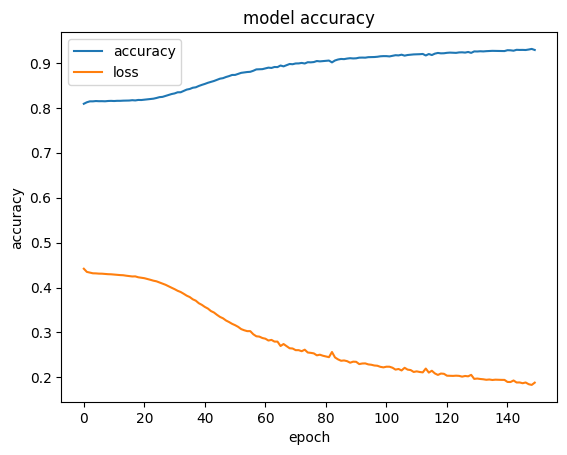

In [18]:
import keras
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [19]:
nn_pred = model.predict(x)

3181/3181 [==============================] - 9s 3ms/step


In [20]:
nn_pred = [int(round(x[0])) for x in nn_pred]

In [21]:
f1_score(y, nn_pred)

0.8491971968420119

In [22]:
nn1_pred = model.predict(x_test)
nn1_pred = [int(round(x[0])) for x in nn1_pred]

2121/2121 [==============================] - 6s 3ms/step


In [23]:
# pred = clf.predict(x_test)

In [24]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# rf = RandomForestClassifier(class_weight = {0:0.77,1:0.22},n_estimators = 600,
#                         n_jobs= -1, oob_score = True)
# rf.fit(x,y)
# f1_score(y,rf.predict(x))

In [25]:
# rf.oob_score_

In [26]:
# pred = rf.predict(x_test)

In [27]:
submission = pd.read_csv("/kaggle/input/playground-series-s3e23/sample_submission.csv")
submission.head()

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5


In [28]:
submission['defects'] = nn1_pred
submission.head()

,id,defects
0,101763,0
1,101764,0
2,101765,1
3,101766,1
4,101767,0


In [29]:
submission.to_csv('submission.csv', index = False)